# ソフトコンピューティング
 155755G 情報工学科３年次  佐藤匠


- [ソフトコンピューティング](#ソフトコンピューティング)
    - [実験内容](#実験内容)
        - [実験課題3番．](#実験課題3番)
        - [データの確認](#データの確認)
        - [3層ニューラルネットワーク](#3層ニューラルネットワーク)
            - [Affineレイヤとは](#affineレイヤとは)
            - [CNNにおけるAffineレイヤ](#cnnにおけるaffineレイヤ)
            - [softmaxレイヤとは](#softmaxレイヤとは)
            - [ReLUレイヤとは](#reluレイヤとは)
        - [バッチ処理](#バッチ処理)
        - [考察](#考察)
        - [考察を踏まえた改善](#考察を踏まえた改善)
            - [Dropout関数](#dropout関数)
        - [改善の結果](#改善の結果)

# 実験内容
## 実験．
 
 
  自身が興味のあるデータセットを用意して、CNNを用いた計算実験を行い、レポート報告する。レポート形式は自由。
 
 

　本稿ではKeras用いて，手書き数字(以降MNIST)の画像を分類(以降MNIST分類)し，次に学習結果の向上の考察をする．


#### MNISTを実装する意義
　本来では，cifar10分類問題などをテーマに選ぶべきであるが，用意されたMNIST分類の実装は自分で行ったものでないために，CNNの構造の理解には適さないと考え，自分に適したレベルのテーマとして，MNISTを自らで実装することとする．
 
 
 
まずはじめに，畳み込みニューラルネットワーク(以降CNN)ではない実装の１つ，結合を全結合で行うレイヤ(以降Affineレイヤ)によるMNISTの実装を行う．

次に，CNNを用いた，MNIST分類を行う．
## CNNを用いないMNIST分類の実装

## データの確認
 MNISTのデータをニューラルネットワーク(以降NN)に入力したい．


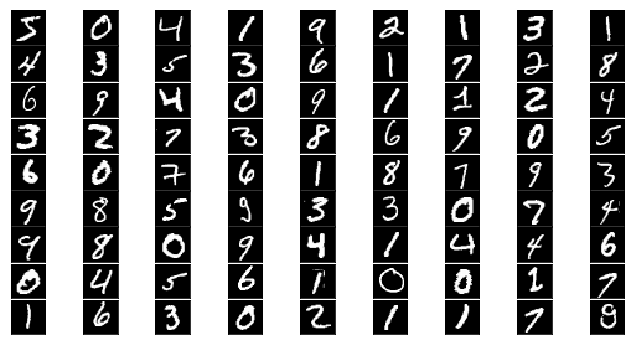

In [2]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割している.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

 60,000枚の28x28，10個の数字の白黒画像と10,000枚のテスト用画像データセット

In [3]:
num_classes = 10 # 出力層(output layer)のニューロンは10個 分類したい数に対応している．
x_train = x_train.reshape(60000, 784) #  reshapeは28×28画素の画像を784×1のデータに変換している．
x_test = x_test.reshape(10000, 784)
#各データを扱いにくいので、RGBの値(白なら255、黒なら0)を利用して0から1までの間に正規化.
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
#to_categorical()は，num_classの数の要素を持つ前からy_trainがonehotのリストを作る．
#0#[1,0,0,0,0,0,0,0,0,0]
#1#[0,1,0,0,0,0,0,0,0,0]

## 3層ニューラルネットワーク
　MNISTのデータを受け取り,学習する3層ニューラルネットワーク．


　Affine->relu->Affine->relu->softmax の順でデータを渡す，線形スタックである．


### Affineレイヤとは
　Affineレイヤは，ニューロン同士が全結合のニューラルネットワークレイヤを指す．
 
### CNNにおけるAffineレイヤ
　CNNはAffineレイヤに加え，畳み込みレイヤ(Convolution)とプーリングレイヤ(Pooling)を用いる．

### softmaxレイヤとは
　入力されたデータを足した値が1になるように出力する層．各要素の大小関係は変わらない．NNにおいて往々にして出力層はsoftmaxレイヤである．この特性から，a%で結果A,b%で結果B,c%で結果Cという確率的な答えが求められる場合がある．しかし，今回のようなクラス分類問題では，出力の一番大きいニューロンに相当するものみが選ばれるため，その役割は満たせない．
### ReLUレイヤとは
　活性化関数として使われる．回路におけるスイッチの様に機能する．

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

##add()でレイヤーを重ねる．
##Affine->relu->Affine->relu->softmax の3層NNの線形スタック
##dropout()で過学習を抑制．
##512はニューロンの数
##activationで活性化関数をreluに指定．
##最後の出力層にはsoftmaxを指定．

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) ## 入力のshapeは(512,784,)になる．
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) ## ２度目以降は入力のshapeをkerasが推定．
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))## softmaxは今回は分類問題なので，必要性は低い．

##訓練プロセスの設定
##RMSprop()は学習係数を過去の勾配を徐々に忘れる，"指数移動平均"を使う．
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## バッチ処理
　バッチ処理によって，実行時間を短縮することができる．
 imageのサイズ/バッチのサイズ ->1epochでの計算回数

In [6]:
batch_size = 128
epochs = 20 ##学習の回数
##historyにfittingの課程を保存．
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s - loss: 0.2501 - acc: 0.9226 - val_loss: 0.1096 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 13s - loss: 0.1025 - acc: 0.9682 - val_loss: 0.1021 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 14s - loss: 0.0776 - acc: 0.9764 - val_loss: 0.0755 - val_acc: 0.9778
Epoch 4/20
60000/60000 [==============================] - 13s - loss: 0.0615 - acc: 0.9818 - val_loss: 0.0894 - val_acc: 0.9746
Epoch 5/20
60000/60000 [==============================] - 13s - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0784 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 13s - loss: 0.0451 - acc: 0.9872 - val_loss: 0.0778 - val_acc: 0.9806
Epoch 7/20
60000/60000 [==============================] - 13s - loss: 0.0398 - acc: 0.9886 - val_loss: 0.0697 - val_acc: 0.9831
Epoch 8/20
60000/60000 [==============================

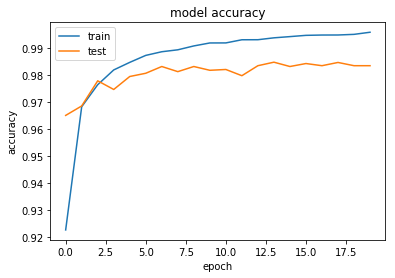

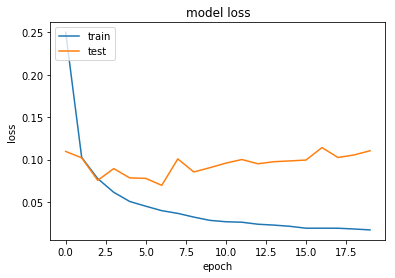

In [7]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 考察
　上記出力結果のmodel lossが,学習が進むに連れて悪くなっていった．これは過学習をしかけていると考えられる．
## 考察を踏まえた改善

### Dropout関数
　過学習を防ぐ手法にDropoutがある．ランダムにニューロンを削除することにより，過学習を防いでいる．

### 最適化関数
RMSpropsから，Adadeltaへ変更した．これらは最適化関数Adagradは急速に学習率が低下するという問題点から，過去の勾配を利用するという共通点がある．


#### Adadelta
過去の勾配による影響を減衰させる.
\begin{align}
r &\leftarrow \gamma r + (1 - \gamma) g_\vec{w}^{2} \\
v &\equiv \frac{\sqrt{s + \epsilon}}{\sqrt{r + \epsilon}} g_\vec{w} \\
w &\leftarrow w - \alpha v \\
s &\leftarrow \gamma s + (1 - \gamma) v^{2}
\end{align}

#### RMSprop
学習率は、勾配の二乗の指数関数的減衰平均の除算．
過去の勾配による影響を減衰させる．

\begin{align}
r &\leftarrow \gamma r + (1 - \gamma) g_\vec{w}^{2} \\
w &\leftarrow w - \frac{\alpha}{\sqrt{r} + \epsilon} g_\vec{w}
\end{align}

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adadelta


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2))## dropout()で過学習を抑制．
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2))## dropout()で過学習を抑制．
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s - loss: 0.3602 - acc: 0.8959 - val_loss: 0.1609 - val_acc: 0.9517
Epoch 2/20
60000/60000 [==============================] - 18s - loss: 0.1556 - acc: 0.9540 - val_loss: 0.1114 - val_acc: 0.9667
Epoch 3/20
60000/60000 [==============================] - 15s - loss: 0.1121 - acc: 0.9658 - val_loss: 0.0936 - val_acc: 0.9712
Epoch 4/20
60000/60000 [==============================] - 14s - loss: 0.0885 - acc: 0.9726 - val_loss: 0.0741 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 12s - loss: 0.0734 - acc: 0.9782 - val_loss: 0.0719 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 12s - loss: 0.0607 - acc: 0.9816 - val_loss: 0.0654 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 13s - loss: 0.0518 - acc: 0.9840 - val_loss: 0.0669 - val_acc: 0.9796
Epoch 8/20
60000/60000 [==============================

## 改善の結果
　Dropoutを用いた結果，過学習を防ぐことができた．

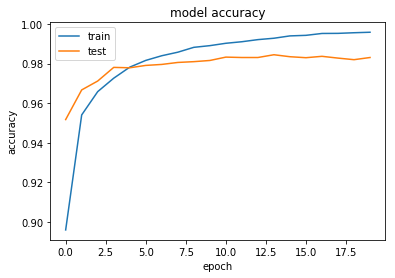

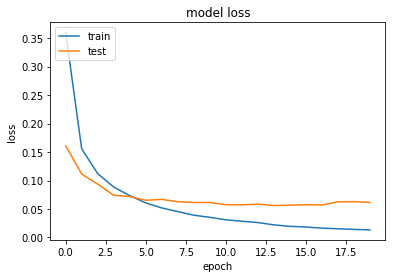

In [6]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNNによるMNIST分類の実装
### 異なる点
　CNNを用いない上記の実装では，28ピクセル×28ピクセルのデータを784次元のベクトルに変換して入力していた．CNNは行列で入力するため，次元数を落とすことによるデータの形状の情報の欠損がない．


In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28 ##画像のピクセル数

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Kerasのバックエンドで動くTensorFlowとTheanoでは入力チャンネルの順番が違うので場合分けして書いています
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



Using TensorFlow backend.


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


## CNNによる3層ニューラルネットワーク
　Convolution->relu->Convolution->relu->softmaxの線形スタック．

### Convolutionレイヤ
畳み込み層．形状を維持する．


画像の場合，入力データを3次元のデータとして受け取り，同じく3次元のデータとして，次の層にデータを出力する．

#### 畳み込み演算
フィルター演算とも言う．


入力データをフィルターの一定のウィンドウの要素との乗算をし，その和を求める．積和演算とも言う．




### Poolingレイヤ
縦,横方向の空間を小さくする演算を行う．


### Flatten関数
入力を平滑化する．バッチサイズの影響を受けない．コード中では，1次元配列へ変換している．

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))#行列で入力
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #Poolingレイヤ
model.add(Dropout(0.25))#dropout
model.add(Flatten())#1次元配列へ変換
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 254s - loss: 0.3201 - acc: 0.9028 - val_loss: 0.0764 - val_acc: 0.9761
Epoch 2/12
60000/60000 [==============================] - 247s - loss: 0.1121 - acc: 0.9668 - val_loss: 0.0531 - val_acc: 0.9824
Epoch 3/12
60000/60000 [==============================] - 226s - loss: 0.0859 - acc: 0.9750 - val_loss: 0.0436 - val_acc: 0.9861
Epoch 4/12
60000/60000 [==============================] - 224s - loss: 0.0725 - acc: 0.9785 - val_loss: 0.0394 - val_acc: 0.9874
Epoch 5/12
60000/60000 [==============================] - 249s - loss: 0.0618 - acc: 0.9814 - val_loss: 0.0354 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 217s - loss: 0.0556 - acc: 0.9832 - val_loss: 0.0354 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 223s - loss: 0.0503 - acc: 0.9846 - val_loss: 0.0331 - val_acc: 0.9893
Epoch 8/12
60000/60000 [=======================

### 実行結果

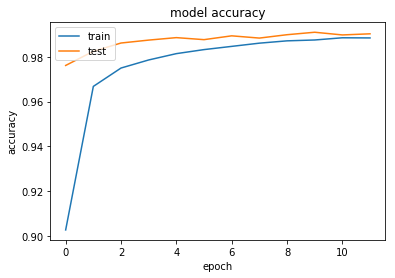

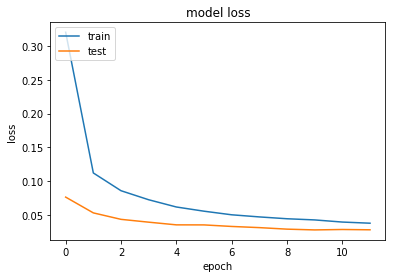

In [10]:
import matplotlib.pyplot as plt
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 実行結果の比較
#### CNNではない実装
```
Epoch 12/20
60000/60000 [==============================] - 15s - loss: 0.0286 - acc: 0.9911 - val_loss: 0.0573 - val_acc: 0.9831
```
```
Epoch 20/20
60000/60000 [==============================] - 16s - loss: 0.0133 - acc: 0.9959 - val_loss: 0.0615 - val_acc: 0.9831
```

#### CNNによる実装

```
Epoch 5/12
60000/60000 [==============================] - 249s - loss: 0.0618 - acc: 0.9814 - val_loss: 0.0354 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 217s - loss: 0.0556 - acc: 0.9832 - val_loss: 0.0354 - val_acc: 0.9876
```
```
Epoch 12/12
60000/60000 [==============================] - 205s - loss: 0.0379 - acc: 0.9884 - val_loss: 0.0281 - val_acc: 0.9902
```

#### 正答率
　どちらも，98.8%以上の確率で文字を認識している．しかし，CNNを用いた実装のほうが，収束が遅い．
 

　原因は二つ考えられる．
 
 1つは一番の違いである，ニューラルネットワーク層の構造が複雑になったことから，12というephoch数では，足りなかったと考えられる．
 
 2つ目は，原因はなく，この差はただの誤差であると考えることだ．ニューラルネットワークの実装の課程で，ランダムにニューロンを削除するdropoutや，正答かどうかを判断するための教師データを元データからランダムに選び出したりなど，ランダムに選ぶことがよくある．この為にたまたま収束が遅い事があり得ると考えられる．
 

#### 今後の課題
　本稿では，MNIST分類問題をテーマに，畳み込みニューラルネットワーク(CNN)とそれ以前のニューラルネットワークを比較して実装し，CNNの特徴について学んだ．


　本稿ではMNIST分類をテーマとして選択したが，CNNの特徴であるデータの形状が持つ情報を活かせる複雑なテーマではなかったことがCNNとそうでない実装の実験結果の比較からも分かる．次はこれらの違いが如実に出るような，複雑な分類問題に取り組みたい．